<a href="https://colab.research.google.com/github/joaochenriques/MCTE_2020_2021/blob/main/LaRanceExample/LaRance_bid_const_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import matplotlib.pyplot as mpl
import numpy as np
%config InlineBackend.figure_formats = ['svg']
mpl.rcParams["figure.figsize"] = (12, 3)

In [20]:
π = np.pi
two_π = 2.0 * π
ga = 9.8
rho_w = 1025.0

In [21]:
ζ_tid = 6.75
H_rat = 5.6
S_bas = 22.0 * 1000.0**2

In [22]:
QT = 200.0
n = 24
sum_QT = n * QT

In [23]:
Qs = 600.0
m = 8
sum_Qs = m * Qs

G_ε = sum_Qs / np.sqrt( 2.0 * ga * ζ_tid ) + sum_QT / np.sqrt( 2.0 * ga * H_rat )

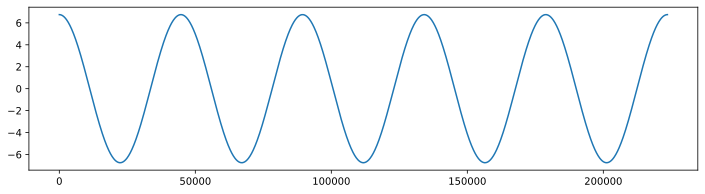

In [24]:
Per = 12.0*3600.0 + 25.2*60.0
kp = 5 # number of periods

# time points
t_vec  = np.linspace( 0.0, kp*Per, kp*300 )
delta_t = t_vec[1]

# the tidel level
y_vec = ζ_tid * np.cos( two_π * t_vec / Per )

mpl.plot( t_vec, y_vec );

Power = 188.72 MW
Max P(t) = 351.86 MW
Cap factor = 0.54


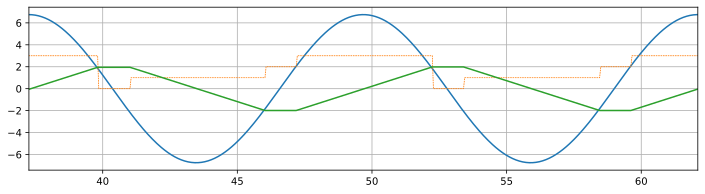

In [28]:
# initial control stage
u = 0
u_vec = np.zeros( t_vec.size )

# instantaneous power
P_vec = np.zeros( t_vec.size )

# volume vector
V_vec = np.zeros( t_vec.size )

# flow rate vector
Q_vec = np.zeros( t_vec.size )

# initial condition
V_vec[0] = S_bas * 1.2#y[0]

# minimum h for turbine starting
h_min = 4

for i, t in enumerate( t_vec[:-1] ): 
  z0 = V_vec[i] / S_bas 
  h = z0 - y_vec[i]
  
  #__STAGE 0_________________________
  if u == 0:
    if h > h_min: 
      u = 1
      Q = sum_QT
      # reset average power
      E = 0.0
      Te = 0.0
    else:
      Q = 0.0
  
  #__STAGE 1_________________________
  elif u == 1:
    if h <= 0.0:
      Q = 0.0
      u = 2
    else:
      Q = sum_QT      
       
  #__STAGE 2_________________________
  elif u == 2:
    if h < -h_min:
      Q = -sum_QT
      u = 3
    else:
      Q = 0
      
  #__STAGE 3_________________________
  elif u == 3:
    if h >= 0.0:
      Q = 0.0
      u = 0
    else:
      Q = -sum_QT
      
  #__________________________________
  if u == 1 or u == 3:
    P_vec[i+1] = rho_w * ga * h * Q

  u_vec[i+1] = u
  V_vec[i+1] = V_vec[i] - delta_t * Q
      
P_avg = np.mean(P_vec) / 1E6
P_max = np.max( P_vec) / 1E6
C_fac = P_avg / P_max

print( "Power = %.2f MW" % P_avg ) 
print( "Max P(t) = %.2f MW" % P_max ) 
print( "Cap factor = %.2f" % C_fac ) 


mpl.plot( t_vec/3600, y_vec )
mpl.plot( t_vec/3600, u_vec, dashes=(2,1,2,1), lw=0.8 );
mpl.plot( t_vec/3600, V_vec/S_bas, lw=1.5 )
mpl.grid()
mpl.xlim( 3*Per/3600, 5*Per/3600 );

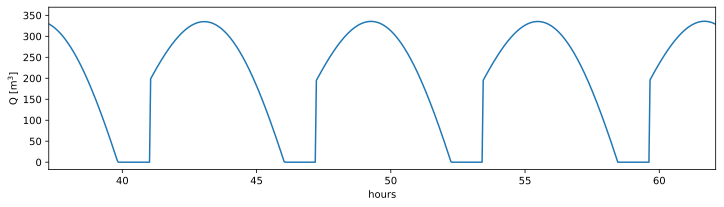

In [31]:
mpl.plot( t_vec/3600, P_vec/1e6 );
mpl.xlim( 3*Per/3600, 5*Per/3600 )
mpl.xlabel( "hours");
mpl.ylabel( "Q [m$^3$]");